#### This is the 'Modeling' Workbook by Megan Gray utilizing the "Forest Cover Type Dataset: Tree types found in the Roosevelt National Forest in Colorado."

https://www.kaggle.com/uciml/forest-cover-type-dataset

Please note that you will need to apply the covtype.csv datafile from the above link to the 'Scrub' workbook in order to procure the "soilsCovDF" file needed for this section of the process.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

import os
import time
import sys

##### According to dataset specifications, here is a list of Cover Types and the respective Tree Types:

1 -- Spruce/Fir
2 -- Lodgepole Pine
3 -- Ponderosa Pine
4 -- Cottonwood/Willow
5 -- Aspen
6 -- Douglas-fir
7 -- Krummholz

In [2]:
soilsCovDF = pd.read_csv("Data/soilsCovtype.csv")

/Users/Megan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
soilsCovDF.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Cover_Type,SoilType,Soil_Type,code,family,sub-family,description,climatic zone,geologic zone,GeoSoils
0,2596,51,3,258,0,510,221,232,148,6279,...,5,29,29,7745,Como,Legault,extremely stony,subalpine,igneous and metamorphic,1
1,2590,56,2,212,-6,390,220,235,151,6225,...,5,29,29,7745,Como,Legault,extremely stony,subalpine,igneous and metamorphic,1
2,2595,45,2,153,-1,391,220,234,150,6172,...,5,29,29,7745,Como,Legault,extremely stony,subalpine,igneous and metamorphic,1
3,2579,132,6,300,-15,67,230,237,140,6031,...,2,29,29,7745,Como,Legault,extremely stony,subalpine,igneous and metamorphic,1
4,2606,45,7,270,5,633,222,225,138,6256,...,5,29,29,7745,Como,Legault,extremely stony,subalpine,igneous and metamorphic,1


In [4]:
soilsCovDF.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Cover_Type', 'SoilType', 'Soil_Type', 'code', 'family', 'sub-family',
       'description', 'climatic zone', 'geologic zone', 'GeoSoils'],
      dtype='object')

#### To begin the modeling process - I need to specify which features to use for the model to train on.

In [5]:
features_to_use = [
#     "Cover_Type",
    "GeoSoils",
    "Elevation",  
    "Slope", 
    "Hillshade_9am", 
    "Hillshade_3pm", 
    "Horizontal_Distance_To_Hydrology", 
    "Horizontal_Distance_To_Fire_Points"
]

#### However I do need to drop un-needed columns from the dataset for now. I may need to come back to this and remove some of these items from the drop list to re-incorporate if I feel that they are needed.

In [6]:
CoverTypeDF = soilsCovDF.drop(columns=[
    "Aspect",
    "Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways",
    "Hillshade_Noon",
    "Wilderness_Area1",
    "Wilderness_Area2",
    "Wilderness_Area3",
    "Wilderness_Area4",
    "SoilType",
    "Soil_Type",
    "code",
    "family",
    "sub-family",
    "description",
    "climatic zone",
    "geologic zone"
    ])

In [7]:
# Show what the working dataset now looks like.
CoverTypeDF.head()

,Elevation,Slope,Horizontal_Distance_To_Hydrology,Hillshade_9am,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,GeoSoils
0,2596,3,258,221,148,6279,5,1
1,2590,2,212,220,151,6225,5,1
2,2595,2,153,220,150,6172,5,1
3,2579,6,300,230,140,6031,2,1
4,2606,7,270,222,138,6256,5,1


In [8]:
# Check the data types for each line of data.
CoverTypeDF.dtypes

Elevation                             int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Hillshade_9am                         int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Cover_Type                            int64
GeoSoils                              int64
dtype: object

In [9]:
features_to_use = [
#     "Cover_Type",
    "GeoSoils",
    "Elevation",  
    "Slope", 
    "Hillshade_9am", 
    "Hillshade_3pm", 
    "Horizontal_Distance_To_Hydrology", 
    "Horizontal_Distance_To_Fire_Points",
]

#### Create 'X' which is the summarized dataframe from CoverTypeDF with the extracted data via 'features_to_use'.

In [10]:
X = CoverTypeDF[features_to_use]

In [11]:
X.head()

,GeoSoils,Elevation,Slope,Hillshade_9am,Hillshade_3pm,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points
0,1,2596,3,221,148,258,6279
1,1,2590,2,220,151,212,6225
2,1,2595,2,220,150,153,6172
3,1,2579,6,230,140,300,6031
4,1,2606,7,222,138,270,6256


In [12]:
# apply X to 'get_dummies' to get X_encoded
X_encoded = pd.get_dummies(X)

In [13]:
# specify what "y" is
y = CoverTypeDF[["Cover_Type"]]

In [14]:
# create training and testing datasets for x and y.
X_train, X_test, y_train, y_test = train_test_split(X_encoded[features_to_use], y)

In [15]:
# normalize the X_train and X_test
sds = StandardScaler()
sds.fit(X_train)
X_train = sds.transform(X_train)
X_test = sds.transform(X_test)

In [16]:
# apply training dataset to see if the DecisionTree Classifier is able to predict features.
for i in range(5):
    
    t0 = time.time()
    clf = DecisionTreeClassifier()
    
    clf.fit(X_train, y_train)
    t1 = time.time()
    
    ypred = clf.predict(X_test)
    scores = roc_auc_score(y_test, ypred)
    
    print(f"Decision tree {i+1} took {t1-t0} seconds to train and got a score of {scores}")
    print()
    print("And here are the top features: ")
    c = X_encoded.columns 
    for cfi in zip(c, clf.feature_importances_):
        print(cfi)
    print()

ValueError: multiclass format is not supported

#### After trying to run the Decision Tree Classifier on main Dataframe - the results come back with "ValueError: multiclass format is not supported". Now is the time to separate Cover_Type out into separate columns with values of '1' or '0' in order to allow for binary values for each covertype and re-run for each.

In [17]:
CoverTypeDF['Y1'] = CoverTypeDF.Cover_Type.apply(lambda x: 1 if x == 1 else 0)
CoverTypeDF['Y2'] = CoverTypeDF.Cover_Type.apply(lambda x: 1 if x == 2 else 0)
CoverTypeDF['Y3'] = CoverTypeDF.Cover_Type.apply(lambda x: 1 if x == 3 else 0)
CoverTypeDF['Y4'] = CoverTypeDF.Cover_Type.apply(lambda x: 1 if x == 4 else 0)
CoverTypeDF['Y5'] = CoverTypeDF.Cover_Type.apply(lambda x: 1 if x == 5 else 0)
CoverTypeDF['Y6'] = CoverTypeDF.Cover_Type.apply(lambda x: 1 if x == 6 else 0)
CoverTypeDF['Y7'] = CoverTypeDF.Cover_Type.apply(lambda x: 1 if x == 7 else 0)

In [18]:
# export new dataframe to csv to preserve data.
CoverTypeCSV = CoverTypeDF.to_csv("Data/CovTypeDF.csv")

In [19]:
CoverTypeDF.head()

,Elevation,Slope,Horizontal_Distance_To_Hydrology,Hillshade_9am,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,GeoSoils,Y1,Y2,Y3,Y4,Y5,Y6,Y7
0,2596,3,258,221,148,6279,5,1,0,0,0,0,1,0,0
1,2590,2,212,220,151,6225,5,1,0,0,0,0,1,0,0
2,2595,2,153,220,150,6172,5,1,0,0,0,0,1,0,0
3,2579,6,300,230,140,6031,2,1,0,1,0,0,0,0,0
4,2606,7,270,222,138,6256,5,1,0,0,0,0,1,0,0


#### Re-do the same modeling process as above but now each CoverType needs to be done individually.

In [20]:
X = CoverTypeDF[features_to_use]

In [21]:
y1 = CoverTypeDF[["Y1"]]

In [22]:
X.head()

,GeoSoils,Elevation,Slope,Hillshade_9am,Hillshade_3pm,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points
0,1,2596,3,221,148,258,6279
1,1,2590,2,220,151,212,6225
2,1,2595,2,220,150,153,6172
3,1,2579,6,230,140,300,6031
4,1,2606,7,222,138,270,6256


In [23]:
y1.head()

,Y1
0,0
1,0
2,0
3,0
4,0


In [24]:
X_encoded = pd.get_dummies(X)

In [25]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_encoded, y1)

In [26]:
X_train1.shape, X_test1.shape

((435759, 7), (145253, 7))

In [27]:
X_train1.head()

,GeoSoils,Elevation,Slope,Hillshade_9am,Hillshade_3pm,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points
563543,1,2570,31,190,173,277,552
518738,1,2874,17,185,202,433,1698
380437,1,3004,18,195,141,532,1961
82733,1,3100,15,192,157,268,900
171299,1,3042,36,234,81,582,859


In [28]:
pd.concat([X_train1, y_train1], axis=1).head()

,GeoSoils,Elevation,Slope,Hillshade_9am,Hillshade_3pm,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points,Y1
563543,1,2570,31,190,173,277,552,0
518738,1,2874,17,185,202,433,1698,0
380437,1,3004,18,195,141,532,1961,0
82733,1,3100,15,192,157,268,900,1
171299,1,3042,36,234,81,582,859,0


In [29]:
sds1 = StandardScaler()
sds1.fit(X_train1)
X_train1 = sds1.transform(X_train1)
X_test1 = sds1.transform(X_test1)

## Decision Tree Classifier

#### Apply Decision Tree Classifier to all 7 Cover Types

1 -- Spruce/Fir
2 -- Lodgepole Pine
3 -- Ponderosa Pine
4 -- Cottonwood/Willow
5 -- Aspen
6 -- Douglas-fir
7 -- Krummholz

In [30]:
# Cover-Type 1: Spruce/Fir

for i in range(5):
    
    t0 = time.time()
    clf = DecisionTreeClassifier()
    
    clf.fit(X_train1, y_train1)
    t1 = time.time()
    
    ypred1 = clf.predict(X_test1)
    scores1 = roc_auc_score(y_test1, ypred1)
    
    print(f"Decision tree {i+1} took {t1-t0} seconds to train and got a score of {scores1}")
    print()
    print("And here are the top features: ")
    c = X_encoded.columns 
    for cfi in zip(c, clf.feature_importances_):
        print(cfi)
    print()

Decision tree 1 took 3.0873427391052246 seconds to train and got a score of 0.8753876176487871

And here are the top features: 
('GeoSoils', 0.03062287972119335)
('Elevation', 0.389626723051759)
('Slope', 0.06380024819540583)
('Hillshade_9am', 0.08587252646699137)
('Hillshade_3pm', 0.09474595013348393)
('Horizontal_Distance_To_Hydrology', 0.11755963753752581)
('Horizontal_Distance_To_Fire_Points', 0.2177720348936407)

Decision tree 2 took 2.9424190521240234 seconds to train and got a score of 0.8750719892330433

And here are the top features: 
('GeoSoils', 0.0305925853030078)
('Elevation', 0.3895651024992156)
('Slope', 0.06345868329576553)
('Hillshade_9am', 0.08539641551192034)
('Hillshade_3pm', 0.09511015566761624)
('Horizontal_Distance_To_Hydrology', 0.11692441749622978)
('Horizontal_Distance_To_Fire_Points', 0.2189526402262446)

Decision tree 3 took 2.9670190811157227 seconds to train and got a score of 0.8744598141549403

And here are the top features: 
('GeoSoils', 0.0306351266491

#### For Type 2 Covertypes - Lodgepole Pine

In [31]:
y2 = CoverTypeDF[["Y2"]]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_encoded, y2)
pd.concat([X_train2, y_train2], axis=1)

# normalizer
sds2 = StandardScaler()
sds2.fit(X_train2)
X_train2 = sds2.transform(X_train2)
X_test2 = sds2.transform(X_test2)

for i in range(5):
    
    t0 = time.time()
    clf = DecisionTreeClassifier()
    
    clf.fit(X_train2, y_train2)
    t1 = time.time()
    
    ypred2 = clf.predict(X_test2)
    scores2 = roc_auc_score(y_test2, ypred2)
    
    print(f"Decision tree {i+1} took {t1-t0} seconds to train and got a score of {scores2}")
    print()
    print("And here are the top features: ")
    c = X_encoded.columns 
    for cfi in zip(c, clf.feature_importances_):
        print(cfi)
    print()

Decision tree 1 took 3.1286537647247314 seconds to train and got a score of 0.8630051944840021

And here are the top features: 
('GeoSoils', 0.02687559381987963)
('Elevation', 0.39015302016645287)
('Slope', 0.06732609293827077)
('Hillshade_9am', 0.08878679105715029)
('Hillshade_3pm', 0.09351728923052881)
('Horizontal_Distance_To_Hydrology', 0.1181111126466284)
('Horizontal_Distance_To_Fire_Points', 0.2152301001410892)

Decision tree 2 took 3.0704634189605713 seconds to train and got a score of 0.8628821045729956

And here are the top features: 
('GeoSoils', 0.026749000835882466)
('Elevation', 0.3904480976313324)
('Slope', 0.06684432363793755)
('Hillshade_9am', 0.08936940192219828)
('Hillshade_3pm', 0.09351131305153096)
('Horizontal_Distance_To_Hydrology', 0.1177409065918153)
('Horizontal_Distance_To_Fire_Points', 0.21533695632930303)

Decision tree 3 took 2.9480550289154053 seconds to train and got a score of 0.8629525611223631

And here are the top features: 
('GeoSoils', 0.0267932402

#### For Type 3 Covertypes - Ponderosa Pine

In [32]:
y3 = CoverTypeDF[["Y3"]]
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_encoded, y3)
pd.concat([X_train3, y_train3], axis=1)

# normalizer
sds3 = StandardScaler()
sds3.fit(X_train3)
X_train3 = sds3.transform(X_train3)
X_test3 = sds3.transform(X_test3)

for i in range(5):
    
    t0 = time.time()
    clf = DecisionTreeClassifier()
    
    clf.fit(X_train3, y_train3)
    t1 = time.time()
    
    ypred3 = clf.predict(X_test3)
    scores3 = roc_auc_score(y_test3, ypred3)
    
    print(f"Decision tree {i+1} took {t1-t0} seconds to train and got a score of {scores3}")
    print()
    print("And here are the top features: ")
    c = X_encoded.columns 
    for cfi in zip(c, clf.feature_importances_):
        print(cfi)
    print()

Decision tree 1 took 1.4681599140167236 seconds to train and got a score of 0.8962617468472518

And here are the top features: 
('GeoSoils', 0.01140019300958032)
('Elevation', 0.5176137925444374)
('Slope', 0.0614549788962319)
('Hillshade_9am', 0.08327621196334187)
('Hillshade_3pm', 0.07705076364545738)
('Horizontal_Distance_To_Hydrology', 0.09434765396137997)
('Horizontal_Distance_To_Fire_Points', 0.15485640597957118)

Decision tree 2 took 1.4363319873809814 seconds to train and got a score of 0.8957765755608414

And here are the top features: 
('GeoSoils', 0.011448190090809067)
('Elevation', 0.5172987171660608)
('Slope', 0.06070656920188194)
('Hillshade_9am', 0.08355270786135047)
('Hillshade_3pm', 0.07654002368768077)
('Horizontal_Distance_To_Hydrology', 0.09473860695960998)
('Horizontal_Distance_To_Fire_Points', 0.1557151850326071)

Decision tree 3 took 1.4262299537658691 seconds to train and got a score of 0.8971419921007134

And here are the top features: 
('GeoSoils', 0.0113858754

#### For Type 4 Covertypes - Cottonwood/Willow

In [33]:
y4 = CoverTypeDF[["Y4"]]
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_encoded, y4)
pd.concat([X_train4, y_train4], axis=1)

# normalizer
sds4 = StandardScaler()
sds4.fit(X_train4)
X_train4 = sds4.transform(X_train4)
X_test4 = sds4.transform(X_test4)

for i in range(5):
    
    t0 = time.time()
    clf = DecisionTreeClassifier()
    
    clf.fit(X_train4, y_train4)
    t1 = time.time()
    
    ypred4 = clf.predict(X_test4)
    scores4 = roc_auc_score(y_test4, ypred4)
    
    print(f"Decision tree {i+1} took {t1-t0} seconds to train and got a score of {scores4}")
    print()
    print("And here are the top features: ")
    c = X_encoded.columns 
    for cfi in zip(c, clf.feature_importances_):
        print(cfi)
    print()

Decision tree 1 took 0.7264788150787354 seconds to train and got a score of 0.865262448263873

And here are the top features: 
('GeoSoils', 0.020500367033715862)
('Elevation', 0.27442744067111063)
('Slope', 0.06615252873370583)
('Hillshade_9am', 0.15026675762245828)
('Hillshade_3pm', 0.07275429000604731)
('Horizontal_Distance_To_Hydrology', 0.2270377374044883)
('Horizontal_Distance_To_Fire_Points', 0.18886087852847366)

Decision tree 2 took 0.722200870513916 seconds to train and got a score of 0.8675628393930801

And here are the top features: 
('GeoSoils', 0.01955349063739275)
('Elevation', 0.2783057267548142)
('Slope', 0.062465875138841206)
('Hillshade_9am', 0.1499358445488427)
('Hillshade_3pm', 0.0733965024309303)
('Horizontal_Distance_To_Hydrology', 0.2277783560431753)
('Horizontal_Distance_To_Fire_Points', 0.18856420444600344)

Decision tree 3 took 0.7413451671600342 seconds to train and got a score of 0.8629897209911457

And here are the top features: 
('GeoSoils', 0.020466547823

#### For Type 5 Covertypes - Aspen

In [34]:
y5 = CoverTypeDF[["Y5"]]
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_encoded, y5)
pd.concat([X_train5, y_train5], axis=1)

# normalizer
sds5 = StandardScaler()
sds5.fit(X_train5)
X_train5 = sds5.transform(X_train5)
X_test5 = sds5.transform(X_test5)

for i in range(5):
    
    t0 = time.time()
    clf = DecisionTreeClassifier()
    
    clf.fit(X_train5, y_train5)
    t1 = time.time()
    
    ypred5 = clf.predict(X_test5)
    scores5 = roc_auc_score(y_test5, ypred5)
    
    print(f"Decision tree {i+1} took {t1-t0} seconds to train and got a score of {scores5}")
    print()
    print("And here are the top features: ")
    c = X_encoded.columns 
    for cfi in zip(c, clf.feature_importances_):
        print(cfi)
    print()

Decision tree 1 took 1.282268762588501 seconds to train and got a score of 0.7956714270860867

And here are the top features: 
('GeoSoils', 0.01073602393342606)
('Elevation', 0.2340919559579985)
('Slope', 0.09278603644804306)
('Hillshade_9am', 0.10552128552229399)
('Hillshade_3pm', 0.13927576487427082)
('Horizontal_Distance_To_Hydrology', 0.16910843740131135)
('Horizontal_Distance_To_Fire_Points', 0.24848049586265608)

Decision tree 2 took 1.2998650074005127 seconds to train and got a score of 0.7987801651439596

And here are the top features: 
('GeoSoils', 0.010835201599149876)
('Elevation', 0.2347585546135082)
('Slope', 0.08927931604258402)
('Hillshade_9am', 0.10503692642383214)
('Hillshade_3pm', 0.1431046163314484)
('Horizontal_Distance_To_Hydrology', 0.16936605041365918)
('Horizontal_Distance_To_Fire_Points', 0.24761933457581817)

Decision tree 3 took 1.2690811157226562 seconds to train and got a score of 0.7988571770808097

And here are the top features: 
('GeoSoils', 0.0109519421

#### For Type 6 Covertypes - Douglas-fir

In [35]:
y6 = CoverTypeDF[["Y6"]]
X_train6, X_test6, y_train6, y_test6 = train_test_split(X_encoded, y6)
pd.concat([X_train6, y_train6], axis=1)

# normalizer
sds6 = StandardScaler()
sds6.fit(X_train6)
X_train6 = sds6.transform(X_train6)
X_test6 = sds6.transform(X_test6)

for i in range(5):
    
    t0 = time.time()
    clf = DecisionTreeClassifier()
    
    clf.fit(X_train6, y_train6)
    t1 = time.time()
    
    ypred6 = clf.predict(X_test6)
    scores6 = roc_auc_score(y_test6, ypred6)
    
    print(f"Decision tree {i+1} took {t1-t0} seconds to train and got a score of {scores6}")
    print()
    print("And here are the top features: ")
    c = X_encoded.columns 
    for cfi in zip(c, clf.feature_importances_):
        print(cfi)
    print()

Decision tree 1 took 1.2616708278656006 seconds to train and got a score of 0.8377454139584587

And here are the top features: 
('GeoSoils', 0.012913003061421255)
('Elevation', 0.3673458276739894)
('Slope', 0.07780371827884486)
('Hillshade_9am', 0.11336065913519948)
('Hillshade_3pm', 0.1040083583247625)
('Horizontal_Distance_To_Hydrology', 0.1285862077497623)
('Horizontal_Distance_To_Fire_Points', 0.19598222577602026)

Decision tree 2 took 1.462508201599121 seconds to train and got a score of 0.8377280690929008

And here are the top features: 
('GeoSoils', 0.012871111976760302)
('Elevation', 0.3672032835283091)
('Slope', 0.07680716515324748)
('Hillshade_9am', 0.11370704232687043)
('Hillshade_3pm', 0.10488953059250586)
('Horizontal_Distance_To_Hydrology', 0.1286557787002988)
('Horizontal_Distance_To_Fire_Points', 0.1958660877220081)

Decision tree 3 took 1.257011890411377 seconds to train and got a score of 0.838403583704941

And here are the top features: 
('GeoSoils', 0.01315946151380

#### For Type 7 Covertypes - Krummholz

In [36]:
y7 = CoverTypeDF[["Y7"]]
X_train7, X_test7, y_train7, y_test7 = train_test_split(X_encoded, y7)
pd.concat([X_train7, y_train7], axis=1)

# normalizer
sds7 = StandardScaler()
sds7.fit(X_train7)
X_train7 = sds7.transform(X_train7)
X_test7 = sds7.transform(X_test7)

for i in range(5):
    
    t0 = time.time()
    clf = DecisionTreeClassifier()
    
    clf.fit(X_train7, y_train7)
    t1 = time.time()
    
    ypred7 = clf.predict(X_test7)
    scores7 = roc_auc_score(y_test7, ypred7)
    
    print(f"Decision tree {i+1} took {t1-t0} seconds to train and got a score of {scores7}")
    print()
    print("And here are the top features: ")
    c = X_encoded.columns 
    for cfi in zip(c, clf.feature_importances_):
        print(cfi)
    print()

Decision tree 1 took 1.5153660774230957 seconds to train and got a score of 0.9148764073845994

And here are the top features: 
('GeoSoils', 0.011602821533840974)
('Elevation', 0.378924610144022)
('Slope', 0.06877053046317524)
('Hillshade_9am', 0.0856287987405456)
('Hillshade_3pm', 0.0888772890528855)
('Horizontal_Distance_To_Hydrology', 0.12719533880065792)
('Horizontal_Distance_To_Fire_Points', 0.23900061126487282)

Decision tree 2 took 1.5457639694213867 seconds to train and got a score of 0.9167640745075369

And here are the top features: 
('GeoSoils', 0.012480811858707221)
('Elevation', 0.38094944715918483)
('Slope', 0.06762147759278475)
('Hillshade_9am', 0.08429124084494033)
('Hillshade_3pm', 0.08885569285817257)
('Horizontal_Distance_To_Hydrology', 0.12674262013642432)
('Horizontal_Distance_To_Fire_Points', 0.23905870954978606)

Decision tree 3 took 1.537513017654419 seconds to train and got a score of 0.9147013518075393

And here are the top features: 
('GeoSoils', 0.0127829218

#### For both all Covertypes, the lowest CLF score for features is consistently GeoSoils. Now it is time to take it out of the 'features_to_use' set to see if this helps to improve the model.

In [37]:
features_to_use = [
#     "Cover_Type",
#     "GeoSoils",
    "Elevation",  
    "Slope", 
    "Hillshade_9am", 
    "Hillshade_3pm", 
    "Horizontal_Distance_To_Hydrology", 
    "Horizontal_Distance_To_Fire_Points"
]

In [38]:
features_to_use

['Elevation',
 'Slope',
 'Hillshade_9am',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Hydrology',
 'Horizontal_Distance_To_Fire_Points']

#### Re-run Y1 through Y7 without GeoSoils

In [39]:
X = CoverTypeDF[features_to_use]
X_encoded = pd.get_dummies(X)

In [40]:
X.head(2)

,Elevation,Slope,Hillshade_9am,Hillshade_3pm,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points
0,2596,3,221,148,258,6279
1,2590,2,220,151,212,6225


In [41]:
y1 = CoverTypeDF[["Y1"]]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_encoded, y1)
pd.concat([X_train1, y_train1], axis=1)

# normalizer
sds1 = StandardScaler()
sds1.fit(X_train1)
X_train1 = sds1.transform(X_train1)
X_test1 = sds1.transform(X_test1)

for i in range(5):
    
    t0 = time.time()
    clf = DecisionTreeClassifier()
    
    clf.fit(X_train1, y_train1)
    t1 = time.time()
    
    ypred1 = clf.predict(X_test1)
    scores1 = roc_auc_score(y_test1, ypred1)
    
    print(f"Decision tree {i+1} took {t1-t0} seconds to train and got a score of {scores1}")
    print()
    print("And here are the top features: ")
    c = X_encoded.columns 
    for cfi in zip(c, clf.feature_importances_):
        print(cfi)
    print()

Decision tree 1 took 2.6457390785217285 seconds to train and got a score of 0.862041478491032

And here are the top features: 
('Elevation', 0.3916260531597723)
('Slope', 0.06981618935933852)
('Hillshade_9am', 0.09378522583185196)
('Hillshade_3pm', 0.10000908229595756)
('Horizontal_Distance_To_Hydrology', 0.11908700426429432)
('Horizontal_Distance_To_Fire_Points', 0.2256764450887854)

Decision tree 2 took 2.6604819297790527 seconds to train and got a score of 0.8619609117707848

And here are the top features: 
('Elevation', 0.3914347950819087)
('Slope', 0.06952961034790946)
('Hillshade_9am', 0.09415238948757515)
('Hillshade_3pm', 0.0997558667663367)
('Horizontal_Distance_To_Hydrology', 0.11877692188989566)
('Horizontal_Distance_To_Fire_Points', 0.22635041642637438)

Decision tree 3 took 2.625119924545288 seconds to train and got a score of 0.8622818855092391

And here are the top features: 
('Elevation', 0.3915521445496806)
('Slope', 0.07003167943394402)
('Hillshade_9am', 0.09436085141

#### Taking GeoSoils out did not have much of an impact to the overall model, but did decrease the score slightly. So - taking this variable out did not improve the model. It appears that adding more variables may help to improve the model.

## Model Bench and Model Selection

In [42]:
CoverTypeDF.head(2)

,Elevation,Slope,Horizontal_Distance_To_Hydrology,Hillshade_9am,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,GeoSoils,Y1,Y2,Y3,Y4,Y5,Y6,Y7
0,2596,3,258,221,148,6279,5,1,0,0,0,0,1,0,0
1,2590,2,212,220,151,6225,5,1,0,0,0,0,1,0,0


In [43]:
features_to_use = [
#     "Cover_Type",
    "GeoSoils",
    "Elevation",  
    "Slope", 
    "Hillshade_9am", 
    "Hillshade_3pm", 
    "Horizontal_Distance_To_Hydrology", 
    "Horizontal_Distance_To_Fire_Points"
]

In [44]:
X = CoverTypeDF[features_to_use]
X_encoded = pd.get_dummies(X)

In [45]:
X_encoded.head()

,GeoSoils,Elevation,Slope,Hillshade_9am,Hillshade_3pm,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points
0,1,2596,3,221,148,258,6279
1,1,2590,2,220,151,212,6225
2,1,2595,2,220,150,153,6172
3,1,2579,6,230,140,300,6031
4,1,2606,7,222,138,270,6256


In [46]:
X_encoded[features_to_use].shape

(581012, 7)

##### Training for Type 1 Covertype - Spruce/Fir

In [47]:
y1 = CoverTypeDF[["Y1"]]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_encoded, y1)
pd.concat([X_train1, y_train1], axis=1)

# normalizer
sds1 = StandardScaler()
sds1.fit(X_train1)
X_train1 = sds1.transform(X_train1)
X_test1 = sds1.transform(X_test1)

In [48]:
X_train1.shape

(435759, 7)

In [49]:
y_train1.shape

(435759, 1)

In [50]:
X_test1.shape

(145253, 7)

In [51]:
y_test1.shape

(145253, 1)

In [52]:
def modelbench(classifier, X_train1, Y_train1):
    
    rs = ShuffleSplit(n_splits=3, test_size=.33)
    
    rs.get_n_splits(X_train)
    
    Y_train1 = Y_train1.values
    Y_train1 = Y_train1.ravel()

    for train_idx, test_idx in rs.split(X_train):
        ssX_train1, ssX_test1 = X_train1[train_idx], X_train1[test_idx]
        ssy_train1, ssy_test1 = Y_train1[train_idx], Y_train1[test_idx]

        t0 = time.time()
        
        clf = classifier
        clf.fit(X=ssX_train1, y=ssy_train1)

        ypred1 = clf.predict(ssX_test1)

        scores1 = roc_auc_score(ssy_test1, ypred1)
    
        t1 = time.time()
    
        print(f"{classifier} \n took {t1-t0} seconds to run and got a score of {scores1}")
        print()

In [53]:
modelbench(DecisionTreeClassifier(), X_train1, y_train1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 
 took 1.8716189861297607 seconds to run and got a score of 0.8566389223814617

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 
 took 1.861806869506836 seconds to run and got a score of 0.8566252361682821

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            m

In [54]:
modelbench(LogisticRegression(), X_train1, y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) 
 took 0.699491024017334 seconds to run and got a score of 0.7270049058427496

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) 
 took 0.6941850185394287 seconds to run and got a score of 0.7265228259593531

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) 
 took 0.6872599124908447 seconds to run and g

In [55]:
modelbench(RandomForestClassifier(), X_train1, y_train1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 
 took 5.592145919799805 seconds to run and got a score of 0.8647157037081487

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 
 took 5.465188026428223 seconds to run and got a score of 0.8641273891801008



In [56]:
modelbench(RandomForestClassifier(n_estimators=50), X_train1, y_train1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 
 took 29.682819843292236 seconds to run and got a score of 0.8861854900498437

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 
 took 27.637573957443237 seconds to run and got a score of 0.8870975609556045

In [57]:
modelbench(RandomForestClassifier(n_estimators=100), X_train1, y_train1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 
 took 60.35780715942383 seconds to run and got a score of 0.8885482819484336

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 
 took 58.305458307266235 seconds to run and got a score of 0.888548804478035

### RandomForest Tuning

In [58]:
params = {
    "max_depth": [2,4,6,8,10],
    "min_samples_split": [5, 9, 19],
    "min_samples_leaf": [2, 5, 10],
    "max_leaf_nodes": [15, 20, 50],
}

In [59]:
grid = GridSearchCV(RandomForestClassifier(n_estimators=10), params, cv=5)

In [60]:
grid

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [5, 9, 19], 'min_samples_leaf': [2, 5, 10], 'max_leaf_nodes': [15, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [61]:
grid.fit(X_train1, y_train1.values.ravel())

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [5, 9, 19], 'min_samples_leaf': [2, 5, 10], 'max_leaf_nodes': [15, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [62]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=50,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [63]:
grid.best_params_

{'max_depth': 10,
 'max_leaf_nodes': 50,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

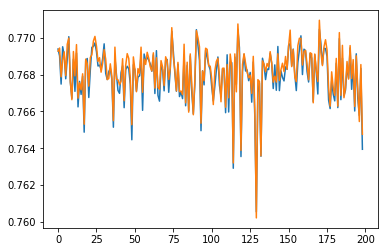

In [64]:
train_auc = []
test_auc = []

for i in range(1,200):
    clf = RandomForestClassifier(max_depth=10, max_leaf_nodes=50, min_samples_split=9,
                                 n_estimators=50)
    
    clf.fit(X_train1, y_train1.values.ravel())
    train_auc.append(roc_auc_score(y_train1, clf.predict(X_train1)))
    test_auc.append(roc_auc_score(y_test1, clf.predict(X_test1)))

train_auc, test_auc

plt.plot(range(199), train_auc)
plt.plot(range(199), test_auc)

In [65]:
train_df = pd.DataFrame(list(zip(train_auc, test_auc)),
              columns=['train_auc','test_auc'])

train_df1_200 = train_df.to_csv("Data/train_df1_200.csv")

##### Training for Type 4 Covertype - Cottonwood

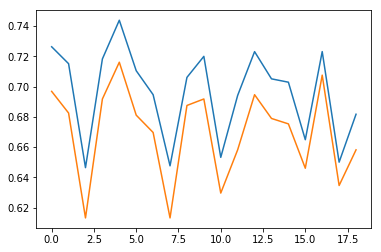

In [66]:
y4 = CoverTypeDF[["Y4"]]
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_encoded, y4)
concat4 = pd.concat([X_train4, y_train4], axis=1)

# normalizer
sds4 = StandardScaler()
sds4.fit(X_train4)
X_train4 = sds4.transform(X_train4)
X_test4 = sds4.transform(X_test4)

# grid training session
train_auc4 = []
test_auc4 = []

for i in range(1,20):
    clf = RandomForestClassifier(max_depth=10, max_leaf_nodes=50, min_samples_split=9,
                                 n_estimators=10)
    
    clf.fit(X_train4, y_train4.values.ravel())
    train_auc4.append(roc_auc_score(y_train4, clf.predict(X_train4)))
    test_auc4.append(roc_auc_score(y_test4, clf.predict(X_test4)))

train_auc4, test_auc4

plt.plot(range(19), train_auc4)
plt.plot(range(19), test_auc4)

In [67]:
train_df4 = pd.DataFrame(list(zip(train_auc4, test_auc4)),
              columns=['train_auc4','test_auc4'])

train_df4 = train_df4.to_csv("Data/train_df4.csv")

##### Training for Type 7 Covertype - Krummholz

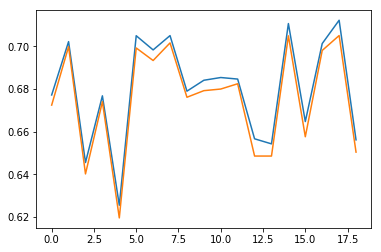

In [68]:
y7 = CoverTypeDF[["Y7"]]
X_train7, X_test7, y_train7, y_test7 = train_test_split(X_encoded, y7)
concat7 = pd.concat([X_train7, y_train7], axis=1)

# normalizer
sds7 = StandardScaler()
sds7.fit(X_train7)
X_train7 = sds7.transform(X_train7)
X_test7 = sds7.transform(X_test7)

# grid training session
train_auc7 = []
test_auc7 = []

for i in range(1,20):
    clf = RandomForestClassifier(max_depth=10, max_leaf_nodes=50, min_samples_split=9,
                                 n_estimators=10)
    
    clf.fit(X_train7, y_train7.values.ravel())
    train_auc7.append(roc_auc_score(y_train7, clf.predict(X_train7)))
    test_auc7.append(roc_auc_score(y_test7, clf.predict(X_test7)))

train_auc7, test_auc7

plt.plot(range(19), train_auc7)
plt.plot(range(19), test_auc7)

In [69]:
train_df7 = pd.DataFrame(list(zip(train_auc7, test_auc7)),
              columns=['train_auc7','test_auc7'])

train_df7 = train_df7.to_csv("Data/train_df7.csv")

In [70]:
params = {
    "max_depth": [5,10,15,20,25],
    "min_samples_split": [5, 10, 14],
    "min_samples_leaf": [2, 5, 10],
    "max_leaf_nodes": [15, 20, 50],
}

In [71]:
grid = GridSearchCV(RandomForestClassifier(n_estimators=20), params, cv=5)

In [72]:
grid

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 10, 15, 20, 25], 'min_samples_split': [5, 10, 14], 'min_samples_leaf': [2, 5, 10], 'max_leaf_nodes': [15, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [73]:
grid.fit(X_train1, y_train1.values.ravel())

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 10, 15, 20, 25], 'min_samples_split': [5, 10, 14], 'min_samples_leaf': [2, 5, 10], 'max_leaf_nodes': [15, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [74]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=50,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=14,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [75]:
grid.best_params_

{'max_depth': 25,
 'max_leaf_nodes': 50,
 'min_samples_leaf': 2,
 'min_samples_split': 14}

In [76]:
clf = RandomForestClassifier(max_depth=10, max_leaf_nodes=50, min_samples_split=5,
                                 n_estimators=20)
clf.fit(X_train1, y_train1.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=50,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [77]:
clf.feature_importances_

array([0.133265  , 0.75609557, 0.01309196, 0.01212151, 0.01158037,
       0.03674187, 0.03710372])

### Save the Model and Load

In [78]:
import pickle
from sklearn.externals import joblib

In [79]:
filename = "./final_covertype.model"

In [80]:
pickle.dump(clf, open(filename, "wb"))

In [81]:
# Save the scaler
joblib.dump(sds1, "covertype_scaler.model")

['covertype_scaler.model']

In [82]:
sds1.mean_

array([8.04676438e-01, 2.95959318e+03, 1.41020220e+01, 2.12165355e+02,
       1.42505885e+02, 2.69763055e+02, 1.97964490e+03])

--- Delete the CLF file to clear it from memory.

In [83]:
del clf

--- Load CLF file in order to apply it to testing set to see how it performs.

In [84]:
clf = pickle.load(open(filename, "rb"))

In [85]:
# CLF specifications
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=50,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [86]:
# test clf on #35.
X_test1[35], y_test1.values.ravel()[35]

(array([ 0.49268198,  0.55173144,  1.45530953,  1.52691883, -2.15589023,
         1.551261  ,  0.19220739]), 0)

In [87]:
clf.predict([X_test1[35]])

array([1])

In [88]:
clf.predict_proba([X_test1[35]])

array([[0.38648869, 0.61351131]])

In [89]:
clf.predict_proba(X_test1)

array([[0.5491467 , 0.4508533 ],
       [0.34697893, 0.65302107],
       [0.81765317, 0.18234683],
       ...,
       [0.43130866, 0.56869134],
       [0.29010457, 0.70989543],
       [0.92515507, 0.07484493]])